In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [37]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/dplustree/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        # if 'O2hfcanddplite' in key:
        # if 'O2hfcanddpml' in key:
        if 'O2hfcanddplite' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

        # if 'O2hfcanddplite' in key:
        if 'O2hfcanddpml' in key:
            print(key)
            dfDataLite = f[key].arrays(library='pd')
            dfsDataLite.append(dfDataLite)

combined_df_data = pd.concat([df for df in dfsData], ignore_index=True)
combined_df_data_lite = pd.concat([df for df in dfsDataLite], ignore_index=True)

print(f"len(combined_df_data): {len(combined_df_data)}")
print(f"len(combined_df_data_lite): {len(combined_df_data_lite)}")

['DF_2336986349216218;1', 'DF_2336986349216218/O2hfcanddplite;1', 'DF_2336986349216218/O2hfcanddpml;1', 'DF_2336986349216250;1', 'DF_2336986349216250/O2hfcanddplite;1', 'DF_2336986349216250/O2hfcanddpml;1', 'DF_2336986349216282;1', 'DF_2336986349216282/O2hfcanddplite;1', 'DF_2336986349216282/O2hfcanddpml;1', 'DF_2336986349216314;1', 'DF_2336986349216314/O2hfcanddplite;1', 'DF_2336986349216314/O2hfcanddpml;1', 'DF_2336986349216346;1', 'DF_2336986349216346/O2hfcanddplite;1', 'DF_2336986349216346/O2hfcanddpml;1', 'DF_2336986349336698;1', 'DF_2336986349336698/O2hfcanddplite;1', 'DF_2336986349336698/O2hfcanddpml;1', 'DF_2336986349336730;1', 'DF_2336986349336730/O2hfcanddplite;1', 'DF_2336986349336730/O2hfcanddpml;1', 'DF_2336986349336762;1', 'DF_2336986349336762/O2hfcanddplite;1', 'DF_2336986349336762/O2hfcanddpml;1', 'DF_2336986349336794;1', 'DF_2336986349336794/O2hfcanddplite;1', 'DF_2336986349336794/O2hfcanddpml;1', 'DF_2336986349336826;1', 'DF_2336986349336826/O2hfcanddplite;1', 'DF_233

In [38]:
combined_df_data.columns
print(len(combined_df_data))
print(combined_df_data.columns)

361
Index(['fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised',
       'fDecayLengthXYNormalised', 'fPtProng0', 'fPtProng1', 'fPtProng2',
       'fImpactParameter0', 'fImpactParameter1', 'fImpactParameter2',
       'fImpactParameterZ0', 'fImpactParameterZ1', 'fImpactParameterZ2',
       'fNSigTpcPi0', 'fNSigTpcKa0', 'fNSigTofPi0', 'fNSigTofKa0',
       'fNSigTpcTofPi0', 'fNSigTpcTofKa0', 'fNSigTpcPi1', 'fNSigTpcKa1',
       'fNSigTofPi1', 'fNSigTofKa1', 'fNSigTpcTofPi1', 'fNSigTpcTofKa1',
       'fNSigTpcPi2', 'fNSigTpcKa2', 'fNSigTofPi2', 'fNSigTofKa2',
       'fNSigTpcTofPi2', 'fNSigTpcTofKa2', 'fCandidateSelFlag', 'fM', 'fPt',
       'fCpa', 'fCpaXY', 'fMaxNormalisedDeltaIP', 'fEta', 'fPhi', 'fY',
       'fFlagMcMatchRec', 'fOriginMcRec', 'fFlagMcDecayChanRec'],
      dtype='object')


In [39]:
unique_values = combined_df_data['fFlagMcMatchRec'].unique()
print("Unique values in fFlagMcMatchRec:", unique_values)

Unique values in fFlagMcMatchRec: [  1  -4  -1   4  16 -16]


In [40]:
unique_values = combined_df_data['fFlagMcDecayChanRec'].unique()
print("Unique values in fFlagMcDecayChanRec:", unique_values)

Unique values in fFlagMcDecayChanRec: [0 3 1 2]


/tmp/ipykernel_3326021/2423839836.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


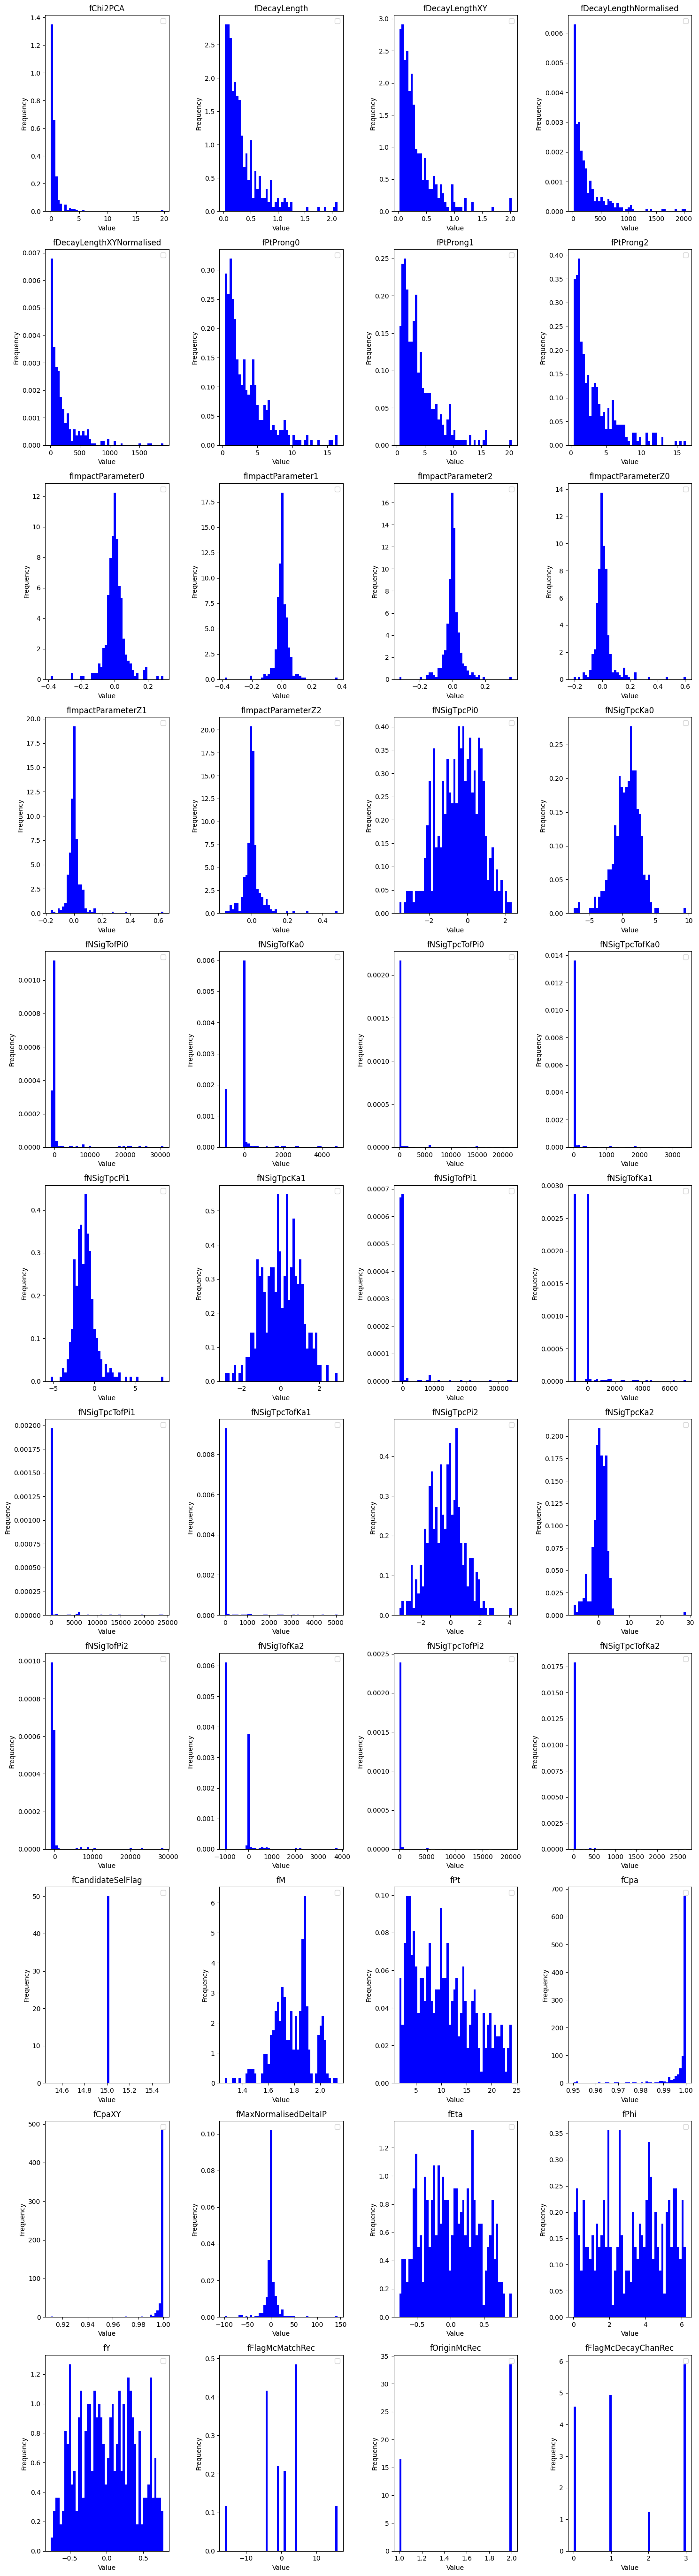

In [41]:
n_columns = len(combined_df_data.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(combined_df_data.columns):
    axes[i].hist(combined_df_data[column], bins=50, color='blue', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

54
8      2
30     2
50     2
52     2
54     2
70     2
80     2
84     2
97     2
104    2
107    2
112    2
146    2
154    2
163    2
168    2
170    2
172    2
175    2
178    2
183    2
186    2
188    2
193    2
208    2
211    2
213    2
217    2
226    1
230    2
232    2
240    1
258    2
260    2
267    2
268    2
282    2
284    2
285    2
292    2
293    2
296    1
298    2
301    1
311    2
313    1
314    2
323    2
331    2
334    2
336    2
339    2
344    2
349    2
Name: fOriginMcRec, dtype: int8
361


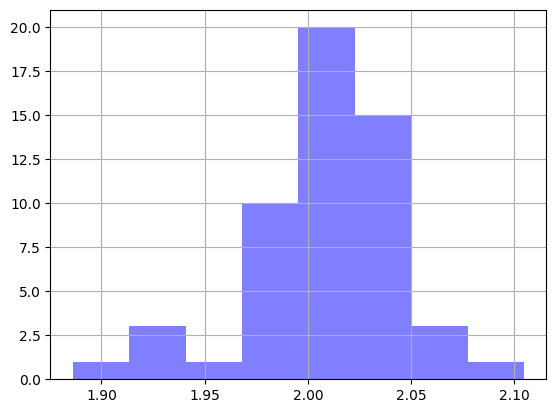

In [42]:
combined_df_data.query('abs(fFlagMcMatchRec) == 16')['fM'].hist(bins=8, color='blue', alpha=0.5, label='Matched')
queried_dstars = combined_df_data.query('abs(fFlagMcMatchRec) == 16')
print(len(queried_dstars['fFlagMcDecayChanRec']))
print(queried_dstars['fOriginMcRec'])
print(len(combined_df_data))

<Axes: >

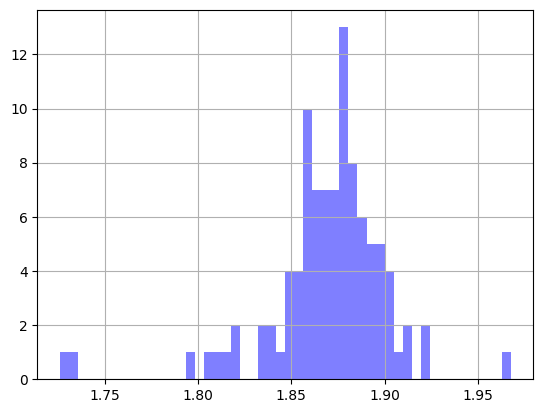

In [43]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 0')['fM'].hist(bins=50, color='blue', alpha=0.5, label='Matched')

<Axes: >

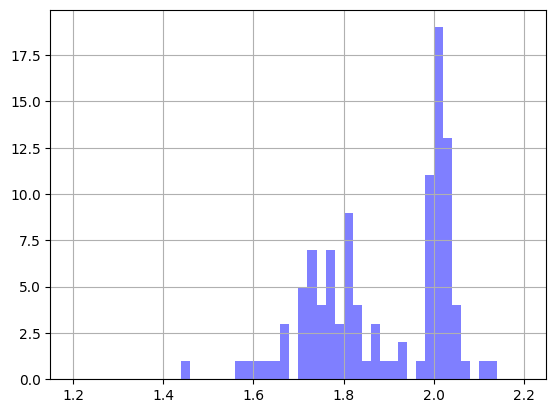

In [44]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 1')['fM'].hist(bins=50, range=(1.2,2.2), color='blue', alpha=0.5, label='Matched')

<Axes: >

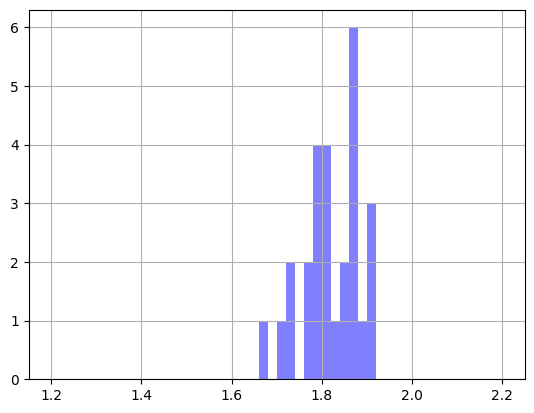

In [45]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 2')['fM'].hist(bins=50, range=(1.2,2.2), color='blue', alpha=0.5, label='Matched')

<Axes: >

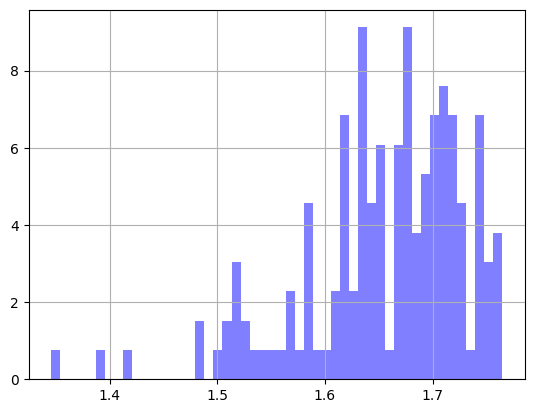

: 

: 

: 

: 

: 

: 

In [ ]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 3')['fM'].hist(bins=50, color='blue', alpha=0.5, density=True, label='Matched')